In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

In [20]:
#alg_label = ["G. LOUDS Backtracking", "G. LOUDS Optimal Order", 
#                "G. DFUDS Backtracking", "G. DFUDS Optimal Order",
 #               "R. LOUDS Backtracking", "R. LOUDS Optimal Order",
  #              "R. DFUDS Backtracking", "R. DFUDS Optimal Order"]
alg_label = ["G. LOUDS Backtrack.", 
             "G. LOUDS Op. Order", 
                "G. DFUDS Backtrack."]#, 
                 #"G. DFUDS Op. Order",
                  #  "R. LOUDS Backtrack.", 
                # "R. LOUDS Op. Order",
                 #   "R. DFUDS Backtrack.", 
                 #"R. DFUDS Op. Order"]
queries_label = ["j3","j4","p2","p3","p4","s1","s2","s3","s4","t2","t3","t4","ti2","ti3","ti4","tr1","tr2"]
queries_title = ["J3","J4","P2","P3","P4","S1","S2","S3","S4","T2","T3","T4","Ti2","Ti3","Ti4","Tr1","Tr2"]

In [23]:
# box plots for each query
# TODO: make file j3... variable
# TDO hacer un for para cada query y función y tamaño k
j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]
datasets =[[],[],[],[],[],[],[],[]]
for i,type_fun in enumerate([0]):#,1]):
    file = f"results-f{type_fun}.csv"
    print(file)
    partialLoudsBack = pd.read_csv(f'../partial/louds/backtracking/{file}', delimiter=';')
    partialLoudsNon = pd.read_csv(f'../partial/louds/nonFixedQueue/{file}', delimiter=';')
    partialDfudsBack = pd.read_csv(f'../partial/dfuds/backtracking/{file}', delimiter=';')
    #partialDfudsNon = pd.read_csv(f'../partial/dfuds/nonFixedQueue/{file}', delimiter=';')

    #rankedLoudsBack = pd.read_csv(f'../ranked/louds/backtracking/{file}', delimiter=';')
    #rankedLoudsNon = pd.read_csv(f'../ranked/louds/nonFixedQueue/{file}', delimiter=';')
    #rankedDfudsBack = pd.read_csv(f'../ranked/dfuds/backtracking/{file}', delimiter=';')
    #rankedDfudsNon = pd.read_csv(f'../ranked/dfuds/nonFixedQueue/{file}', delimiter=';')
    
    datasets[i] = [partialLoudsBack, partialLoudsNon, partialDfudsBack]#, partialDfudsNon,
#                     rankedLoudsBack,rankedLoudsNon, rankedDfudsBack, rankedDfudsNon]
    #traditional = pd.read_csv(f'../all/results.csv',delimiter=';')
 #   print(i)
    for j,query in enumerate(queries_label):
        data[j] = [partialLoudsBack[query], partialLoudsNon[query], partialDfudsBack[query]]#, partialDfudsNon[query], rankedLoudsBack[query], rankedLoudsNon[query], rankedDfudsBack[query], rankedDfudsNon[query]]
        

results-f0.csv


In [24]:
data[16][0]

0    0.051725
1    0.167210
2    0.172097
3    0.194151
Name: tr2, dtype: float64

In [25]:
partialLoudsBack


,k,j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2
0,1,8.98426,69.5617,0.024769,0.607562,18.4370,17.0869,5.98716,7.8290,1.21363,0.010877,0.257754,543.009,0.022113,7.76556,549.67,0.011129,0.051725
1,10,15.12630,113.7190,0.170164,1.666970,40.7442,17.0869,16.46620,10.8890,4.54822,0.037781,1.132290,227.425,0.083800,13.96770,1022.35,0.038297,0.167210
2,100,19.78370,145.4120,0.252208,1.999750,74.3988,17.0869,16.82530,11.1390,4.55719,0.141049,1.685980,313.671,0.215863,27.10570,1297.27,0.043312,0.172097
3,1000,21.03070,177.8240,0.316818,2.135580,75.9776,17.0869,16.88160,11.1731,4.55073,0.162826,3.919460,329.967,0.532557,72.68310,1168.09,0.044875,0.194151


In [26]:
variables = datasets[0][0].columns[1:]  # Excluir la columna 'k'
variables

Index(['j3', 'j4', 'p2', 'p3', 'p4', 's1', 's2', 's3', 's4', 't2', 't3', 't4',
       'ti2', 'ti3', 'ti4', 'tr1', 'tr2'],
      dtype='object')

In [27]:
colors = ['red', 'peru','lightsalmon']#, 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']

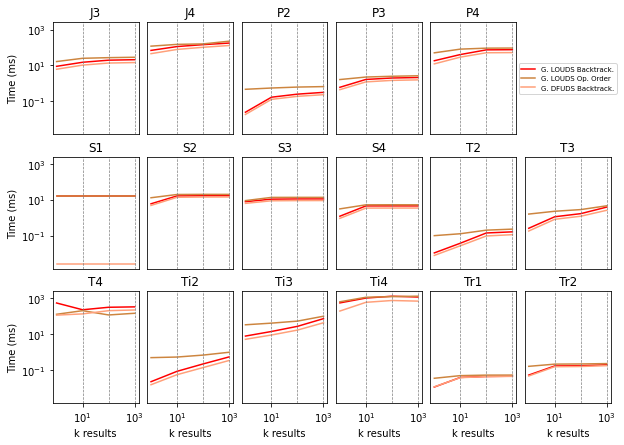

In [30]:
# Crear la figura
fig = plt.figure(figsize=(10, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(3, 6, figure=fig, hspace=0.2, wspace=0.1)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1], sharex=j3, sharey=j3)
p2 = fig.add_subplot(gs[0, 2], sharex=j3, sharey=j3)
p3 = fig.add_subplot(gs[0, 3], sharex=j3, sharey=j3)
p4 = fig.add_subplot(gs[0, 4], sharex=j3, sharey=j3)
color_legend = fig.add_subplot(gs[0, 5]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[1, 0], sharex=j3, sharey=j3)
s2 = fig.add_subplot(gs[1, 1], sharex=j3, sharey=j3)
s3 = fig.add_subplot(gs[1, 2], sharex=j3, sharey=j3)
s4 = fig.add_subplot(gs[1, 3], sharex=j3, sharey=j3)
t2 = fig.add_subplot(gs[1, 4], sharex=j3, sharey=j3)
t3 = fig.add_subplot(gs[1, 5], sharex=j3, sharey=j3)

t4 = fig.add_subplot(gs[2, 0], sharex=j3, sharey=j3)
ti2 = fig.add_subplot(gs[2, 1], sharex=j3, sharey=j3)
ti3 = fig.add_subplot(gs[2, 2], sharex=j3, sharey=j3)
ti4 = fig.add_subplot(gs[2, 3], sharex=j3, sharey=j3)
tr1 = fig.add_subplot(gs[2, 4], sharex=j3, sharey=j3)
tr2 = fig.add_subplot(gs[2, 5], sharex=j3, sharey=j3)

j3.set_ylabel('Time (ms)')
s1.set_ylabel('Time (ms)')
#s3.set_ylabel('Time (ms)')
t4.set_ylabel('Time (ms)')

t4.set_xlabel('k results')
ti2.set_xlabel('k results')
ti3.set_xlabel('k results')
ti4.set_xlabel('k results')
tr1.set_xlabel('k results')
tr2.set_xlabel('k results')
#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0][0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    #query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    if(query != j3 and query != s1 and query != t4):
        query.axes.get_yaxis().set_visible(False)
    if(query != t4 and query != ti2 and query != ti3 and query != ti4 and query != tr1 and query != tr2):
        query.axes.get_xaxis().set_visible(False)

handles, labels = j3.get_legend_handles_labels()
color_legend.legend(handles, labels, loc='center', fontsize='x-small')


plt.savefig('/Users/asugomez/Desktop/Magister/Tesis/tesisQdags/imagenes/all_queries_k_1_10_100_1000.pdf')

plt.show()
 